In [1]:
# some ideas taken from https://www.kaggle.com/code/youssefspasha/predict-house-prices-linear-regression-eda

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = df.drop(['Id'], axis=1)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

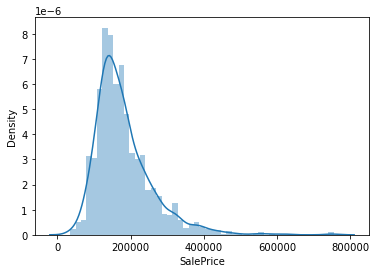

In [5]:
sns.distplot(df['SalePrice'])

In [6]:
# split dataframe into categorical and numerical dataframe
num = []
cat = []

for col in df.columns:
    if df[col].dtype in('int64', 'float64'):
        num.append(df[col].name)
    else:
        cat.append(df[col].name)
        

df_num = df[num]
df_cat = df[cat]

print(num)
print(cat)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:>

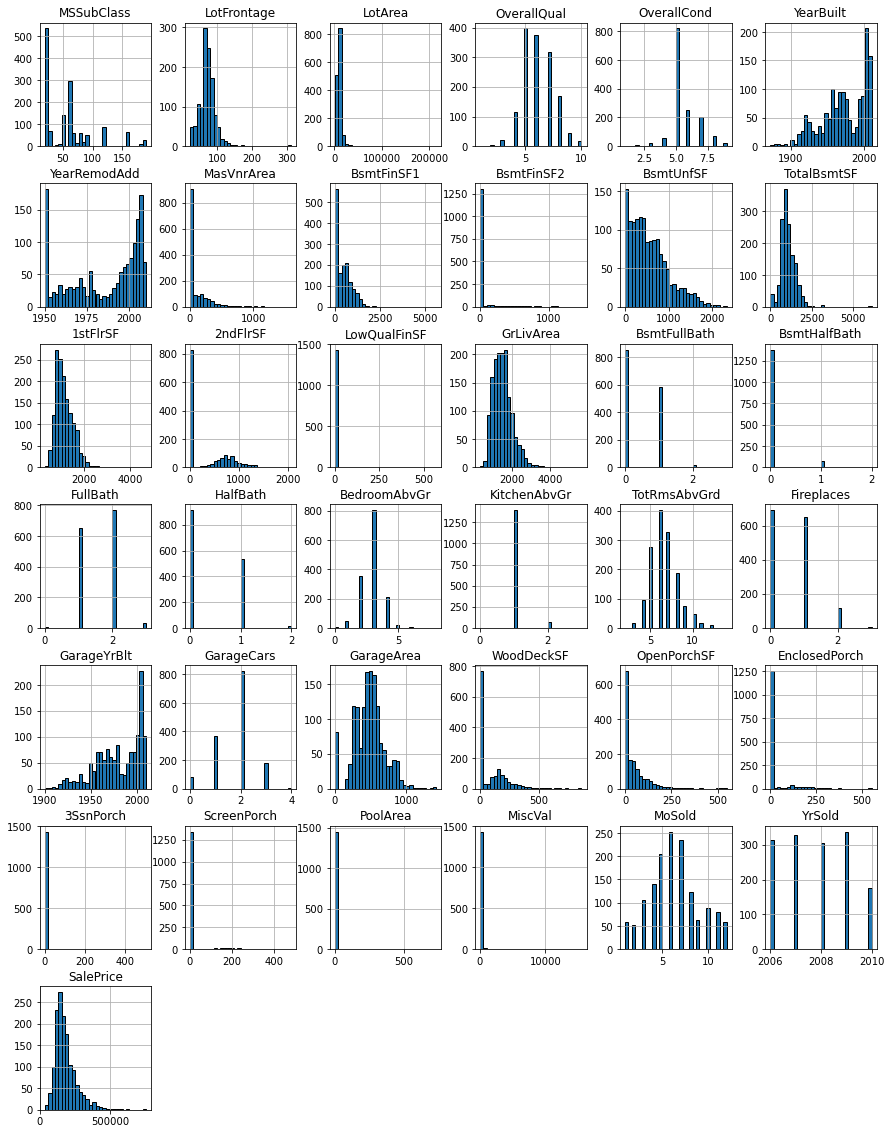

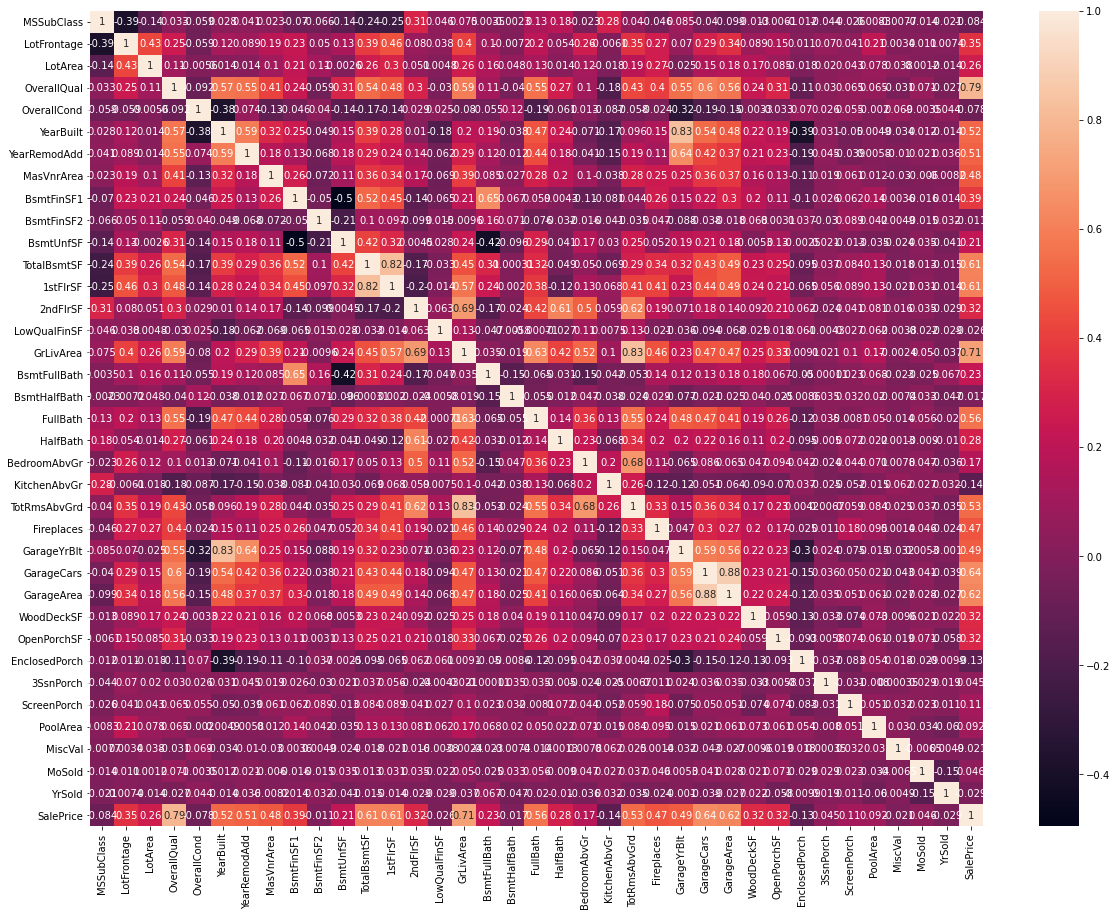

In [7]:
df_num.hist(figsize=(15,20), bins=30, edgecolor='black')

plt.figure(figsize=(20, 15))
sns.heatmap(df_num.corr(), annot=True)

In [8]:
# throw low variance column 
from sklearn.feature_selection import VarianceThreshold

var_cutoff = VarianceThreshold(threshold=0.1)
var_cutoff.fit(df_num)

low_var = [col for col in df_num.columns if col not in df_num.columns[var_cutoff.get_support()]]
df_num = df_num.drop(low_var, axis=1)
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
# columns dropped
print(low_var)

['BsmtHalfBath', 'KitchenAbvGr']


In [10]:
# show low correlation feature
print(np.abs(df_num.corr()['SalePrice']).sort_values())

BsmtFinSF2       0.011378
MiscVal          0.021190
LowQualFinSF     0.025606
YrSold           0.028923
3SsnPorch        0.044584
MoSold           0.046432
OverallCond      0.077856
MSSubClass       0.084284
PoolArea         0.092404
ScreenPorch      0.111447
EnclosedPorch    0.128578
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64


In [11]:
# drop low correlation features
low_corr = []
for col in df_num.columns:
    if df_num.corr()['SalePrice'][col] < 0.2:
        low_corr.append(col)
        
print(low_corr)
df_num = df_num.drop(low_corr, axis=1)
df_num.head()

['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BedroomAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,2,1,8,0,2003.0,2,548,0,61,208500
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,2,0,6,1,1976.0,2,460,298,0,181500
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,2,1,6,1,2001.0,2,608,0,42,223500
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,1,0,7,1,1998.0,3,642,0,35,140000
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,2,1,9,1,2000.0,3,836,192,84,250000


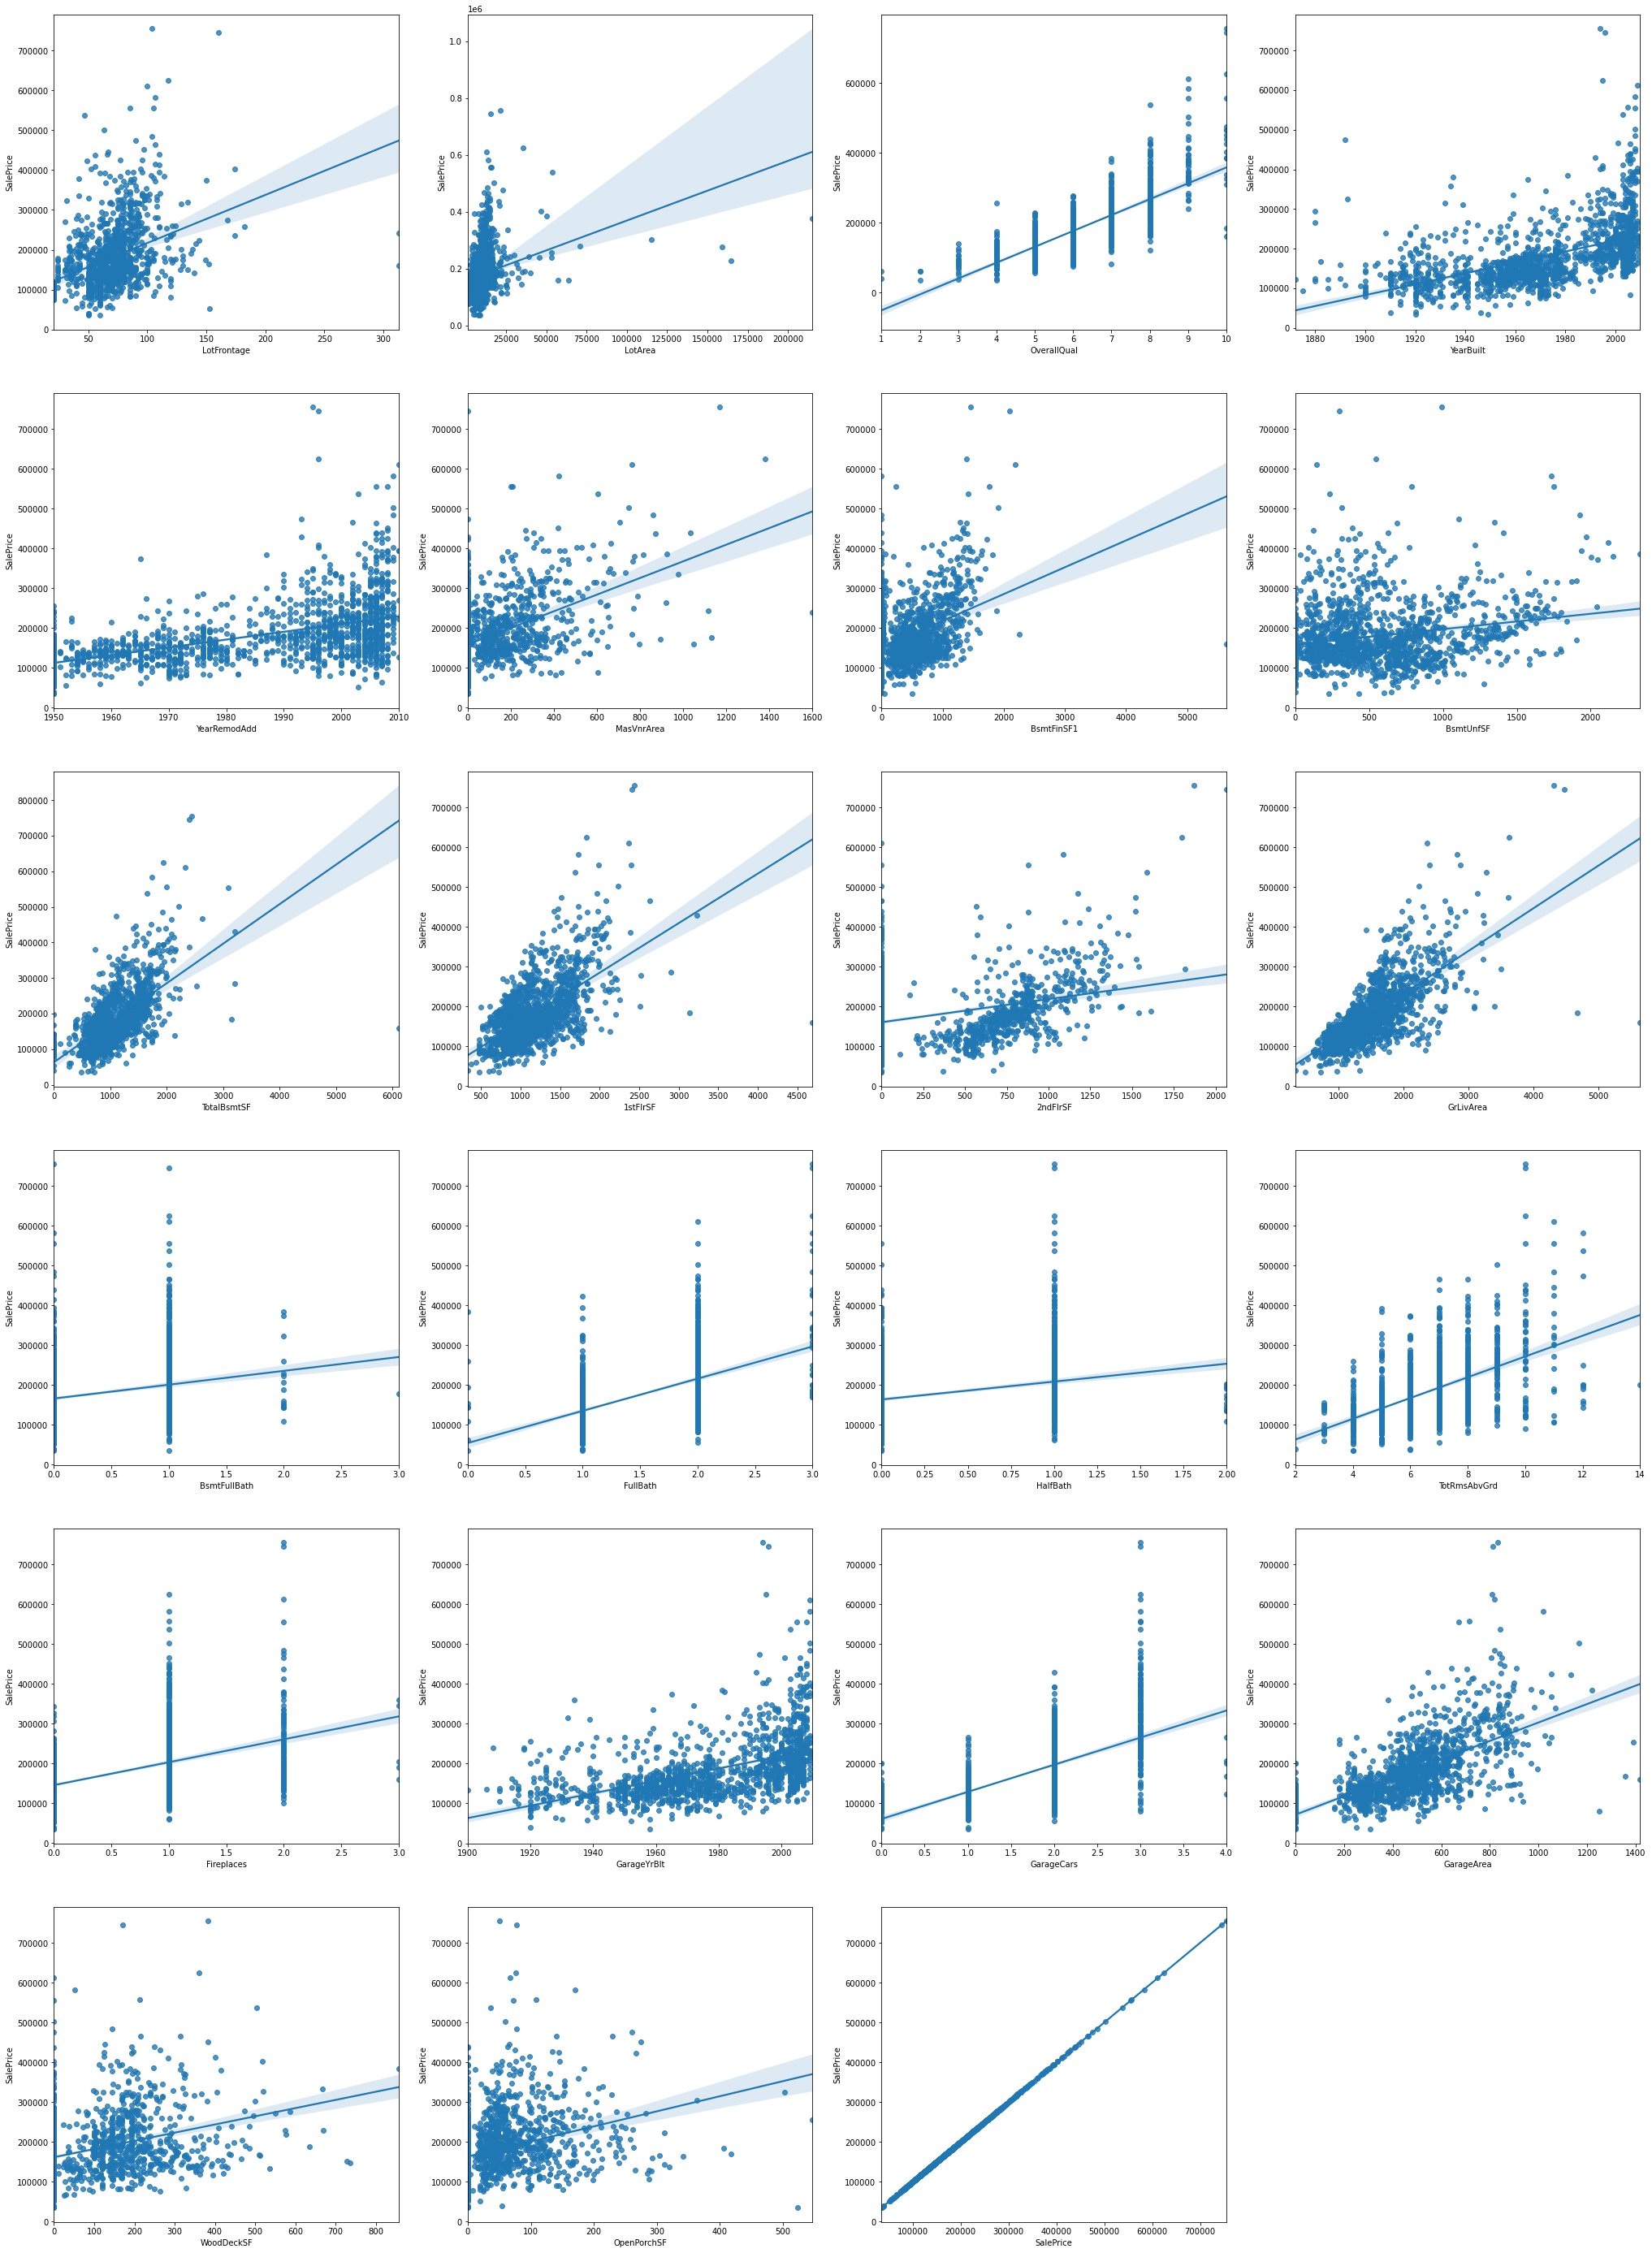

In [18]:
# correlatin regression plot between all features left and sale price
fig = plt.figure(figsize=(35, 50))

for i, col in enumerate(df_num.columns):
    plt.subplot(6, 4, i+1)
    sns.regplot(x=col, y='SalePrice', data=df_num)

In [23]:
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


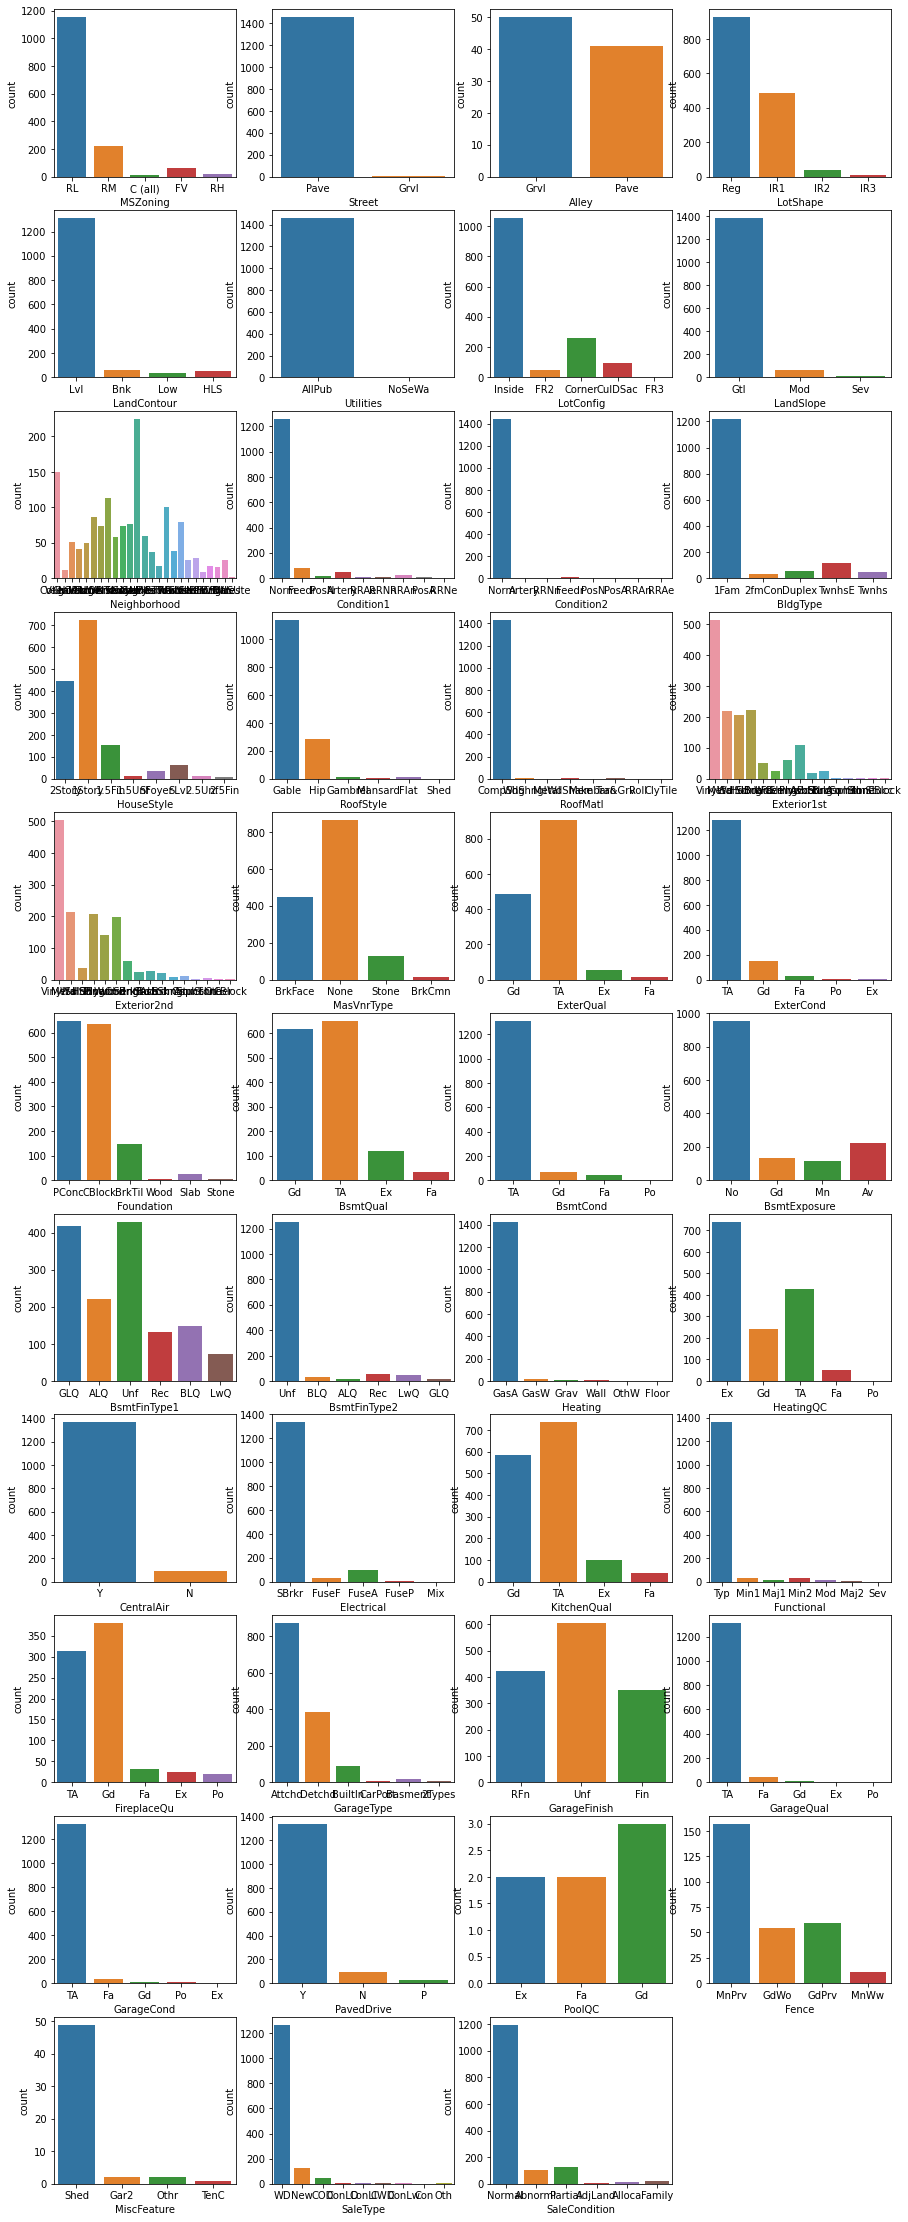

In [27]:
plt.figure(figsize=(15, 40))

for i, col in enumerate(df_cat.columns):
    plt.subplot(11, 4, i+1)
    sns.countplot(x=df_cat[col], data=df_cat)

In [28]:
# drop features where 90% of values lie in one category
low_var_cat = []

for col in df_cat.columns:
    if df_cat[col].value_counts().max() / df_cat[col].count() > 0.9:
        low_var_cat.append(col)
print(low_var_cat)
df_cat = df_cat.drop(low_var_cat, axis=1)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'MiscFeature']


In [30]:
df_cat.head()

,MSZoning,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,SaleType,SaleCondition
0,RL,NaN,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,Unf,Ex,Gd,NaN,Attchd,RFn,NaN,NaN,WD,Normal
1,RL,NaN,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,...,Unf,Ex,TA,TA,Attchd,RFn,NaN,NaN,WD,Normal
2,RL,NaN,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,Unf,Ex,Gd,TA,Attchd,RFn,NaN,NaN,WD,Normal
3,RL,NaN,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,...,Unf,Gd,Gd,Gd,Detchd,Unf,NaN,NaN,WD,Abnorml
4,RL,NaN,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,...,Unf,Ex,Gd,TA,Attchd,RFn,NaN,NaN,WD,Normal


In [42]:
df_num.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [43]:
df_cat.columns

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [50]:
def one_hot(original_dataframe, feature_to_encode):
    dtype = original_dataframe[feature_to_encode].dtype
    
    if dtype == 'object':
        dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
        res = pd.concat([original_dataframe, dummies], axis=1)
        res = res.drop([feature_to_encode], axis=1)
        
        return(res) 
    else: 
        return original_dataframe

def process_data(data):
    for i, col in enumerate(data.columns):
        data = one_hot(data, col)
        
    data = data.to_numpy()
    data = np.nan_to_num(data)
    
    return data

In [51]:
df = df_cat.copy()
df = pd.concat([df, df_num.copy()], axis=1)
df.head()

,MSZoning,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,RL,NaN,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,2,1,8,0,2003.0,2,548,0,61,208500
1,RL,NaN,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,...,2,0,6,1,1976.0,2,460,298,0,181500
2,RL,NaN,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,...,2,1,6,1,2001.0,2,608,0,42,223500
3,RL,NaN,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,...,1,0,7,1,1998.0,3,642,0,35,140000
4,RL,NaN,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,...,2,1,9,1,2000.0,3,836,192,84,250000


In [53]:
for col in df.columns:
    df = one_hot(df, col)

df.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


In [55]:
data = df.to_numpy()
data = np.nan_to_num(data)
data

array([[6.500e+01, 8.450e+03, 7.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [8.000e+01, 9.600e+03, 6.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.800e+01, 1.125e+04, 7.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [6.600e+01, 9.042e+03, 7.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.800e+01, 9.717e+03, 5.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [7.500e+01, 9.937e+03, 5.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])